## Section B. Prediction Uncertainty with Bootstrapping


### Question 3 Bootstrapping


1. bootstrapping for KNN regression <br> 


2. Load Task1B_train.csv and Task1B_test.csv sets. Apply your
bootstrapping for KNN regression with times = 50 (the number of subsets),
size = 20 (the size of each subset), and change K=1,.., 15 (the neighbourhood
size). Now create a boxplot where the x-axis is K, and the y-axis is the
average error (and the uncertainty around it) corresponding to each K.
Save the plot in your Jupyter Notebook file for Question 3.

**I have modified the KNN regression to handle bootstaping and loading data and applied model below:**

Let's load the datasets and have a peek

In [2]:
train_B = read.csv('Task1B_train.csv') 
test_B = read.csv('Task1B_test.csv')
head(train_B)
head(test_B)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


x1,x2,x3,x4,y
1991.500,1613.63,1688.5,1750.5,2460.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.515,1610.61,1671.6,1714.3,2466.8
1991.523,1640.17,1703.6,1757.4,2508.4
1991.531,1645.89,1716.3,1754.3,2497.4
1991.538,1638.35,1730.5,1755.5,2556.8


We will be passing the training predictors and training labels seperately to the knn. <br>
The split is give below:

In [3]:
train.data = train_B[,-5]
head(train.data,2)

x1,x2,x3,x4
1991.496,1628.75,1678.1,1772.8
1991.504,1606.51,1678.6,1718.0


In [4]:
train.label = train_B[,5]
head(train.label)

[1] 2443.6 2448.2 2484.7 2487.9 2510.5 2532.5

In [5]:
test.data = test_B[,-5]
head(test.data,2)

x1,x2,x3,x4
1991.500,1613.63,1688.5,1750.5
1991.508,1621.04,1684.1,1708.1


In [6]:
test.label = test_B[,5]
head(test.label)

[1] 2460.2 2470.4 2466.8 2508.4 2497.4 2556.8

In [7]:
# KNN function
knn_2 <- function(train.data, train.label, test.data, K){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len),drop=FALSE]
    prediction_df = c()
    
    ## for each test sample
    for (i in 1:test.len){
        ### find its K nearest neighbours from training sampels
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        average = sum(train.label[nn])/K
        prediction_df[i] <- average
    }
    
    ## return the class labels as output
    return (prediction_df)
}

**Boot function** will generate n samples of given size. The below boot function will return index values that will correspond to the size of our input data

In [1]:
# define a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

In [9]:
# boot(nrow(train.data), 20, 50)

Now let us implement Bootstrapping with K=15,L=40,N=50 on our knn regression model

In [8]:
# We have fix the parameters (K=15,L=40,N=50)
K <- 15           # Maximum K for KNN 
L <- 50           # number of datasets
N <- 20          # size of datasets

# generate bootstrap indices from above boot function
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the erros for all samples in each case
sample_errors <- data.frame('K'=1:K, 'L'=1:L, 'error'=rep(0,L*K))

## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l in our dataframe
        sample_errors[i,'K'] <- k
        sample_errors[i,'L'] <- l
        
        #### calculate and record the test errors
        predictions = knn_2(train.data[indx, ], train.label[indx], test.data, K=k)
        test_error_k = mean((test.label - predictions) ^ 2)
    
        sample_errors[i,'error'] <-  test_error_k
    } 
}
head(sample_errors)

K,L,error
1,1,27517.24
1,2,33567.92
1,3,20658.66
1,4,23960.29
1,5,39627.36
1,6,26661.87


In [9]:
# plot error for train and test data sets
library (reshape2)

sample_errors_melt <- melt(sample_errors, id=c('K', 'L')) # reshape for visualization

names(sample_errors_melt) <- c('K', 'L', 'type', 'value')

head(sample_errors_melt)

Warning message:
"package 'reshape2' was built under R version 3.6.3"

K,L,type,value
1,1,error,27517.24
1,2,error,33567.92
1,3,error,20658.66
1,4,error,23960.29
1,5,error,39627.36
1,6,error,26661.87


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

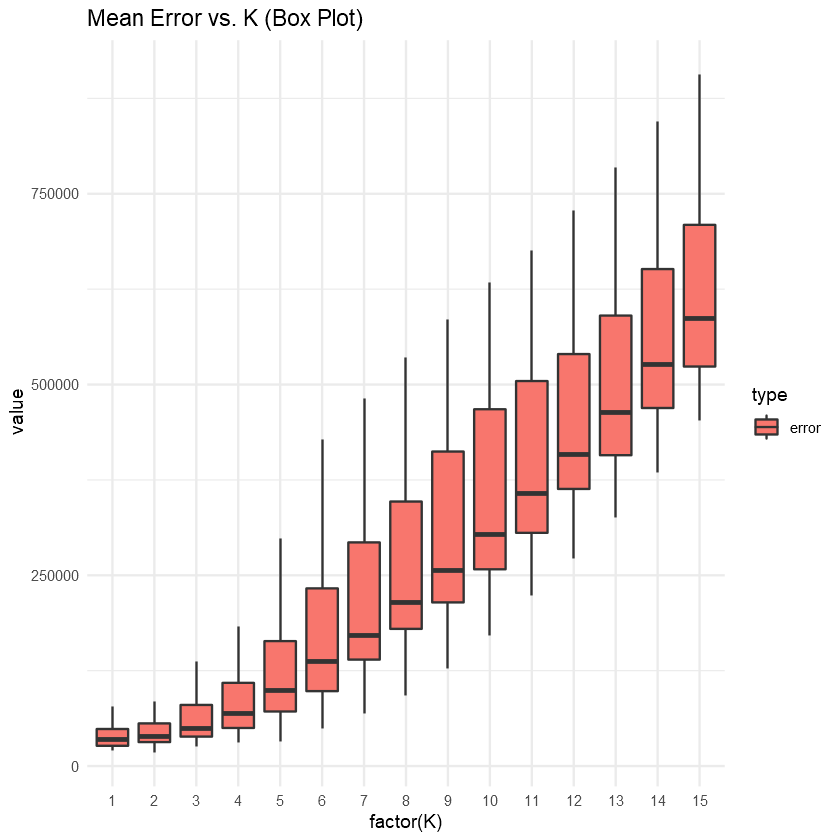

In [10]:
library (ggplot2)

ggplot(data=sample_errors_melt[sample_errors_melt$type=='error',], aes(factor(K), value,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Mean Error vs. K (Box Plot)') + theme_minimal()

# ignore the warnings (because of ignoring outliers)
options(warn=-1)

3. Based on the plot in the previous part, how does the test error and its uncertainty behave as K increases? <br>

**Observations** <br>

* With increase in k i.e number of neighbours, the mean error value considering 50 samples of size 20 shows an increase.
* For lower values of k, the distribution of errors for all samples is right skewed. With each increased value of k, the distribution of errors for all samples starts to tend towards left skewness.
* The median of the distribution also tends to be on higher side for higher values of k.
* For lower values of k, the errors respective to different number of samples seem to be similar and close in terms of value.While for higher values of k, the errors respective to different number of samples are dissimilar, and on higher side.

4. Load Task1B_train.csv and Task1B_test.csv sets. Apply your
bootstrapping for KNN regression with K= 5(the neighbourhood size),
times = 50 (the number of subsets), and change sizes = 5, 10, 15,..., 75 (the
size of each subset). Now create a boxplot where the x-axis is ‘sizes’ and the
y-axis is the average error (and the uncertainty around it) corresponding
to each value of ‘times’. Save the plot in your Jupyter Notebook file for
Question 3.


Let us implement Bootstrapping with K=5,L=1:50,N=5,10,15,..,75 on our knn regression model.

In [11]:
# fix the parameters (K = 5,L = 50)
K <- 5           # Maximum K for KNN 
L <- 50           # number of datasets
N = seq(5,75,5)  # size of datasets

error_df <- data.frame('L'=1:L,'N'=rep(0,L*length(N)),'error'=rep(0,L*length(N)))
i = 1
for (n in N) {
    # generate bootstrap indices:
    boot.indx <- boot(nrow(train.data), n, L)

    for (l in 1:L){
        indx <- boot.indx[l,]
        
        predictions = knn_2(train.data[indx, ], train.label[indx], test.data, K=K)
        test_error_k = mean((test.label - predictions) ^ 2)
        
        error_df[i,'N'] = n
        error_df[i,'L'] = l
        error_df[i,'error'] = test_error_k
        i = i+1

        } 
    }

In [12]:
head(error_df)

L,N,error
1,5,1558863.5
2,5,1820159.0
3,5,963365.1
4,5,1750138.2
5,5,1076542.4
6,5,1130031.4


In [13]:
# reshaping data 
library (reshape2)
error_df_new <- error_df

error_df_new_melt <- melt(error_df_new, id=c('N','L')) # reshape for visualization

names(error_df_new_melt) <- c('N','L','type', 'value')

head(error_df_new_melt)

N,L,type,value
5,1,error,1558863.5
5,2,error,1820159.0
5,3,error,963365.1
5,4,error,1750138.2
5,5,error,1076542.4
5,6,error,1130031.4


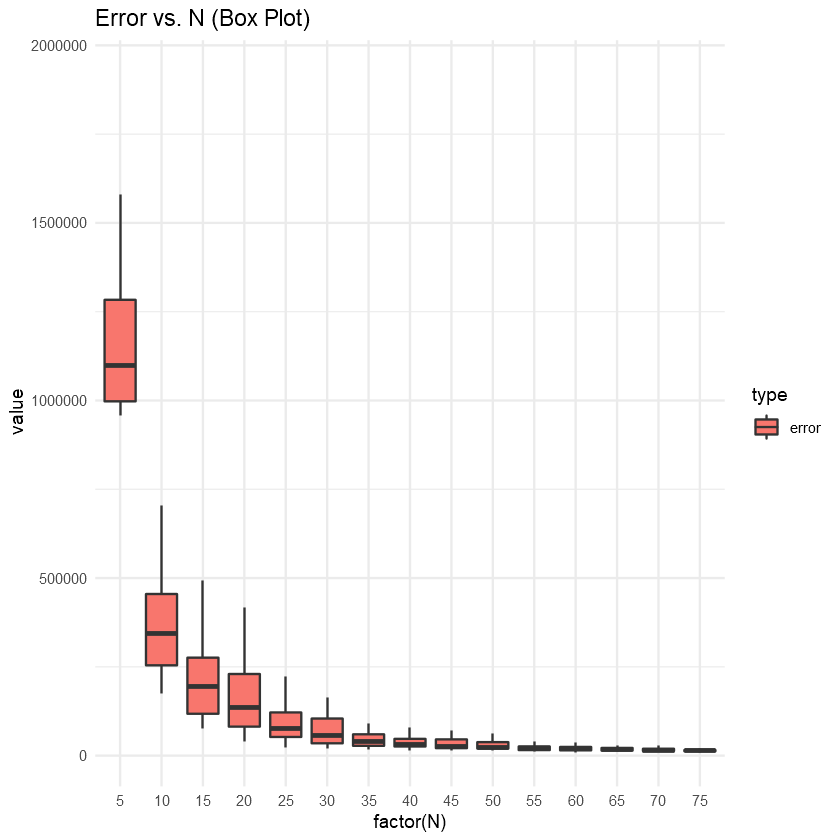

In [14]:
# plot error for train and test data sets
ggplot(data=error_df_new_melt[error_df_new_melt$type=='error',], aes(factor(N), value,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Error vs. N (Box Plot)') + theme_minimal()

# ignore the warnings (because of ignoring outliers)
options(warn=-1)

5. Based on the plot in the previous part (Part 4), how does the test error and
its uncertainty behave as the size of each subset in bootstrapping
increases? Explain in your Jupyter Notebook file. <br>

Here we are considering 1-50 subsets from our data and change size of each subset (N). K-value is kept constant at 5.Each Boxplot shows distribution of errors for number of subsets ranging from 1 to 50 vs size of each sample (ranging from 5 to 75).<br>

**Observations**  <br>

*  For lower sample size values the distribution of errors is right skewed. Distribution becomes somewhat normal with sample size between 20-25.
* For sample size above 25, the distribution of errors becomes left skewed.
* Errors for lower sample size values are on higher side and highly varied, while with incresed sample size values the errors decrease and show much less variance